In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xorca_brokenline as bl
from matplotlib import colors as c

In [2]:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 17})

## Load Data

In [3]:
gridU = xr.open_dataset("grid_U.nc")
gridV = xr.open_dataset("grid_V.nc")

mesh_hgr = xr.open_dataset("mesh_hgr.nc")
mesh_zgr = xr.open_dataset("mesh_zgr.nc")
mask = xr.open_dataset("mask.nc")

fmask = mask['fmask'].isel(t=0,z=0)


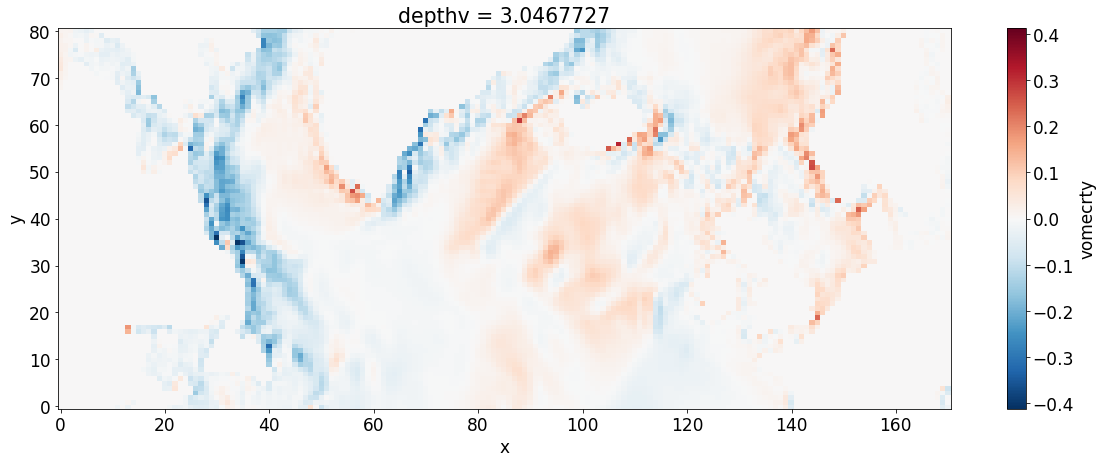

In [4]:
gridV.mean(dim='time_counter').isel(depthv=0).vomecrty.plot()

## Define section

In [7]:
ji_pairs = [(27, 35), (45, 60),(34,127)]
ji = bl.section_indices(ji_pairs=ji_pairs)
jj,ii = zip(*ji)

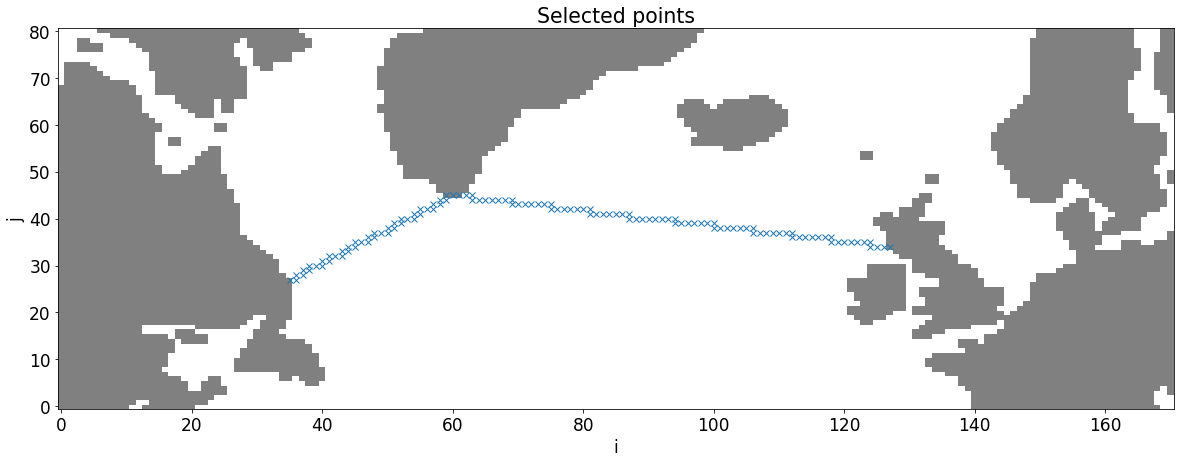

In [8]:
fmask.plot(cmap=c.ListedColormap(['gray','white']),add_colorbar=0)
plt.plot(ii,jj,'x')

plt.ylabel("j")
plt.xlabel("i")
plt.title('Selected points');


## Extract Section
bl.shift_grids() interpolates all variables onto the u- and v-points, drops unnecessary coordinate labels and variables and renames depth dimension. <br>
select_section() selects the section defined by ji from gridU_processed and gridV_processed and returns a section.


In [9]:
ji = bl.section_indices(ji_pairs=ji_pairs)
gridU_processed, gridV_processed = bl.shift_grids(gridU=gridU, gridV=gridV)
section = bl.select_section(ji,gridU_processed,gridV_processed,mesh_hgr,mesh_zgr,mask).compute()

Section includes the velocity normal to the section (either U or V, depending on the orientation of each segment), the length and depth of each segment and a land-sea mask variable. 

In [6]:
section

<xarray.Dataset>
Dimensions:       (c: 121, time_counter: 12, z: 46)
Coordinates:
  * c             (c) float64 3.406e+04 6.715e+04 ... 3.926e+06 3.96e+06
  * z             (z) float64 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
  * time_counter  (time_counter) object 2009-01-16 05:00:00.3 ... 2009-12-16 19:00:00
Data variables:
    u_normal      (time_counter, z, c) float64 0.2611 0.1597 0.07557 ... 0.0 0.0
    dx            (c) float64 3.406e+04 3.309e+04 ... 3.381e+04 3.382e+04
    dz            (z, c) float64 6.191 6.191 6.191 6.191 ... 250.4 250.4 250.4
    mask          (z, c) float32 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0

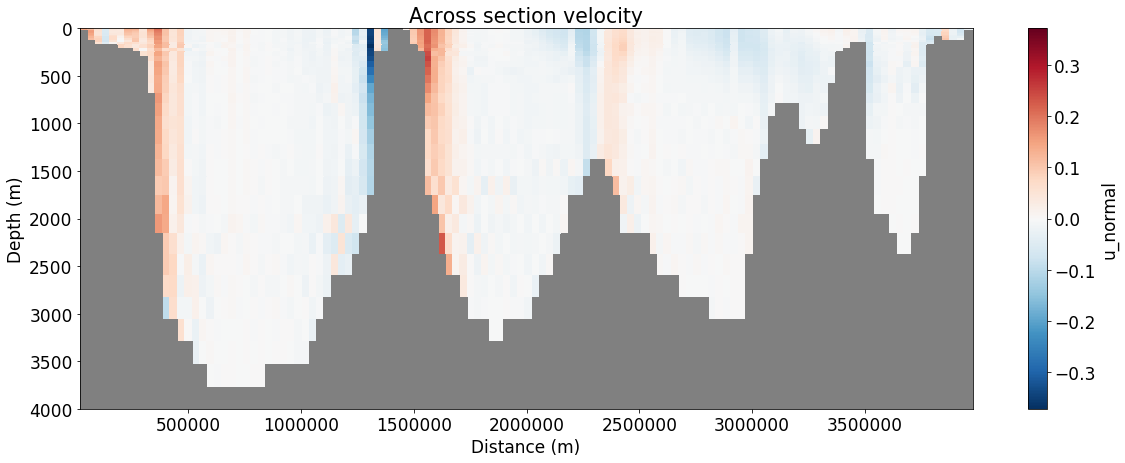

In [7]:

section['u_normal'].mean('time_counter').plot()
section['mask'].where(section['mask']==0).plot(cmap=c.ListedColormap(['gray']),add_colorbar=0)
plt.ylim(4000,0)
plt.ylabel("Depth (m)")
plt.xlabel("Distance (m)")
plt.title("Across section velocity");

## Volume Transport

In [8]:
transport = bl.calculate_transport(section)
transport

<xarray.Dataset>
Dimensions:       (time_counter: 12)
Coordinates:
  * time_counter  (time_counter) object 2009-01-16 05:00:00.3 ... 2009-12-16 19:00:00
Data variables:
    trsp          (time_counter) float64 1.202 1.855 1.469 ... 1.342 1.511 1.795

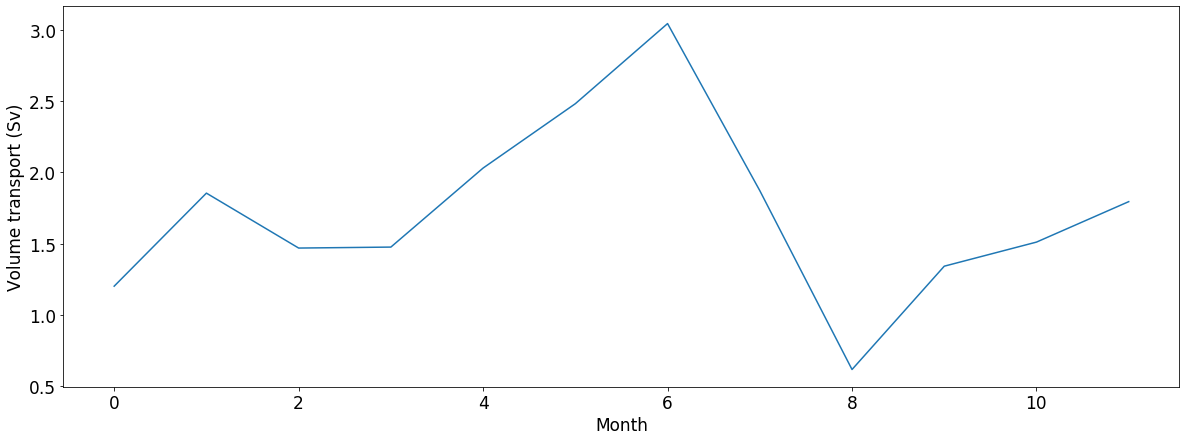

In [9]:
plt.plot(transport['trsp'])
plt.ylabel("Volume transport (Sv)");
plt.xlabel("Month");